(6362620, 11)
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


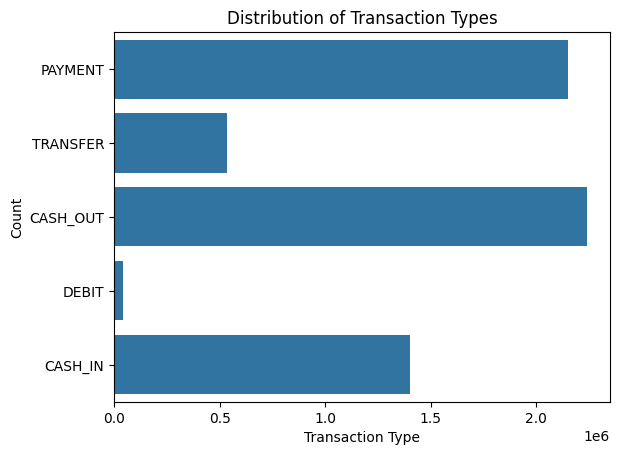

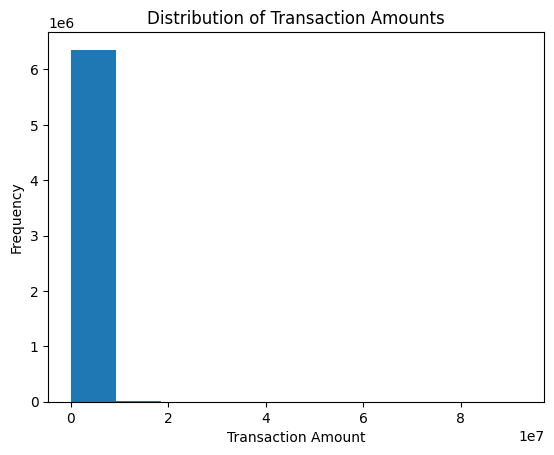

isFraud
0    0.998709
1    0.001291
Name: count, dtype: float64


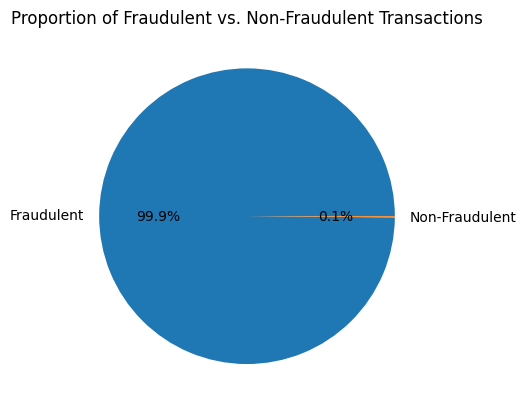

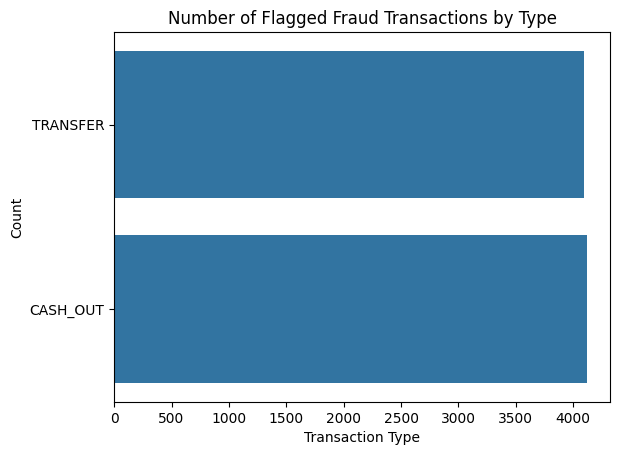

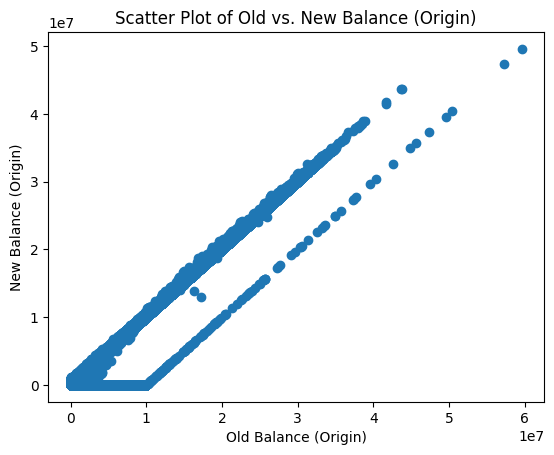

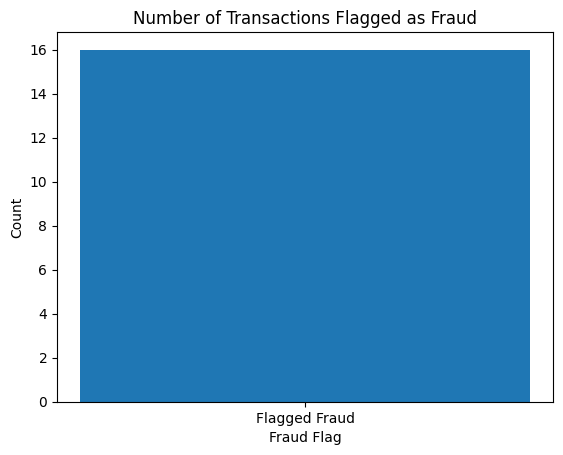

The number of flagged fraud transactions that are also marked as fraud is 0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: isFlaggedFraud, Length: 6362620, dtype: bool


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the transaction data dataset
transaction_data = pd.read_csv('data.csv')

# Basic data exploration
print(transaction_data.shape)
print(transaction_data.isnull().sum())
print(transaction_data['amount'].describe())

# Visualizing transaction types
sns.countplot(transaction_data['type'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()


plt.hist(transaction_data['amount'])
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

# Fraud analysis
fraud_proportion = transaction_data['isFraud'].value_counts() / transaction_data['isFraud'].count()
print(fraud_proportion)

plt.pie(fraud_proportion, labels=['Fraudulent', 'Non-Fraudulent'], autopct='%1.1f%%')
plt.title('Proportion of Fraudulent vs. Non-Fraudulent Transactions')
plt.show()

sns.countplot(transaction_data[transaction_data['isFraud'] == 1]['type'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Number of Flagged Fraud Transactions by Type')
plt.show()

# Balance analysis
plt.scatter(transaction_data['oldbalanceOrg'], transaction_data['newbalanceOrig'])
plt.xlabel('Old Balance (Origin)')
plt.ylabel('New Balance (Origin)')
plt.title('Scatter Plot of Old vs. New Balance (Origin)')
plt.show()


flagged_fraud_count = transaction_data['isFlaggedFraud'].sum()

plt.bar(['Flagged Fraud'], [flagged_fraud_count])
plt.xlabel('Fraud Flag')
plt.ylabel('Count')
plt.title('Number of Transactions Flagged as Fraud')
plt.show()

flagged_fraud_and_fraud_count = (transaction_data['isFlaggedFraud'] == 1) & (transaction_data['isFraud'] == 1).sum()

print('The number of flagged fraud transactions that are also marked as fraud is', flagged_fraud_and_fraud_count)
